In [5]:
import numpy as np
from sklearn.feature_selection import mutual_info_classif, SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import chi2
from sklearn.linear_model import Lasso
from scipy.sparse.linalg import svds
import matplotlib.pyplot as plt


# 1. Méthodes Basées sur la Similarité
def laplacian_score(X):
    from sklearn.metrics.pairwise import rbf_kernel
    n_samples, n_features = X.shape
    W = rbf_kernel(X)  # Construction de la matrice d'affinité avec un noyau RBF
    D = np.diag(W.sum(axis=1))
    L = D - W  # Matrice de Laplacien
    scores = []
    for i in range(n_features):
        f = X[:, i]
        scores.append((f.T @ L @ f) / (f.T @ D @ f))
    return np.array(scores)


# 2. Méthodes Basées sur l'Information Théorique
def fisher_score(X, y):
    classes = np.unique(y)
    scores = []
    for feature in X.T:
        inter_class = np.sum([np.mean(feature[y == c]) ** 2 for c in classes])
        intra_class = np.sum([np.var(feature[y == c]) for c in classes])
        scores.append(inter_class / intra_class)
    return np.array(scores)

def mutual_information(X, y):
    return mutual_info_classif(X, y)


# 3. Méthodes d'Apprentissage Parcimonieux
def sparse_group_lasso(X, y, alpha=0.1):
    model = Lasso(alpha=alpha)
    model.fit(X, y)
    return np.abs(model.coef_)


# 4. Méthodes Statistiques
def low_variance_filter(X, threshold=0.01):
    variances = np.var(X, axis=0)
    selected_features = np.where(variances > threshold)[0]
    return selected_features

def chi_square(X, y):
    # S'assurer que X est non-négatif
    X = X - X.min(axis=0)  # Décale toutes les valeurs pour qu'elles soient positives
    chi2_values, p_values = chi2(X, y)
    return chi2_values



# Exemple d'utilisation sur des données synthétiques
if __name__ == "__main__":
    from sklearn.datasets import make_classification

    # Création de données synthétiques
    X, y = make_classification(n_samples=100, n_features=10, random_state=42)

    # Standardisation des données
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    # Méthodes de Similarité
    laplacian_scores = laplacian_score(X)
    print("Laplacian Scores:", laplacian_scores)

    # Méthodes Basées sur l'Information Théorique
    fisher_scores = fisher_score(X, y)
    print("Fisher Scores:", fisher_scores)

    mutual_info_scores = mutual_information(X, y)
    print("Mutual Information Scores:", mutual_info_scores)

    # Méthodes d'Apprentissage Parcimonieux
    sparse_scores = sparse_group_lasso(X, y, alpha=0.1)
    print("Sparse Group Lasso Scores:", sparse_scores)

    # Méthodes Statistiques
    selected_features = low_variance_filter(X, threshold=0.01)
    print("Selected Features by Low Variance Filter:", selected_features)

    chi2_scores = chi_square(X, y)
    print("Chi-Square Scores:", chi2_scores)


Laplacian Scores: [0.61296159 0.6004407  0.65880981 0.64920414 0.79896139 0.80212387
 0.80621715 0.79415721 0.81310765 0.79737846]
Fisher Scores: [1.39719878e+00 1.18746007e-02 2.96609501e+00 4.26235108e-02
 1.40157879e-03 1.52190743e-03 7.23872633e-03 2.96247302e-03
 3.64918569e-03 2.90389148e-02]
Mutual Information Scores: [0.37770909 0.         0.58309083 0.0022282  0.         0.
 0.         0.0354247  0.0413659  0.0088028 ]
Sparse Group Lasso Scores: [0.         0.         0.33253429 0.00736789 0.         0.
 0.         0.         0.         0.        ]
Selected Features by Low Variance Filter: [0 1 2 3 4 5 6 7 8 9]
Chi-Square Scores: [27.15557127  0.58043955 38.51055292  2.19199589  0.05597157  0.05817192
  0.31377184  0.17696184  0.12611205  1.18493595]


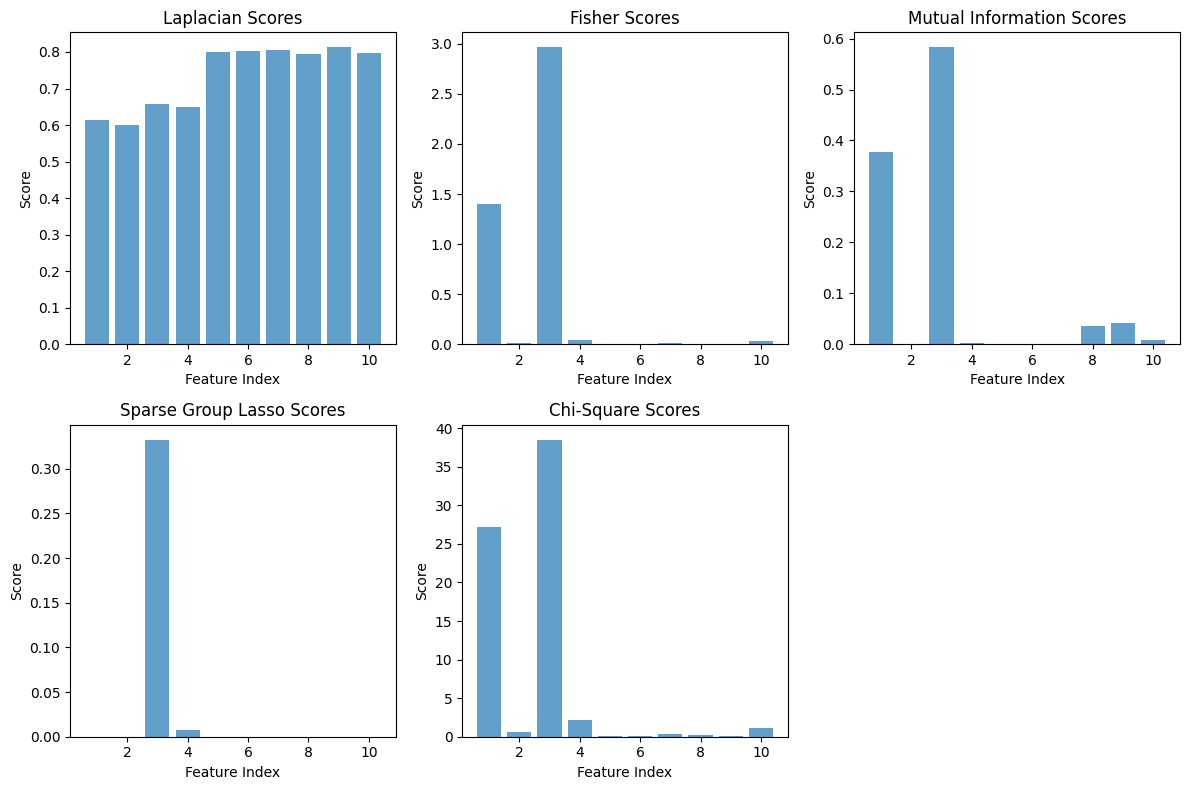

In [7]:
features = np.arange(1, 11)

# Plotting
plt.figure(figsize=(12, 8))

# Laplacian Scores
plt.subplot(2, 3, 1)
plt.bar(features, laplacian_scores, alpha=0.7)
plt.title('Laplacian Scores')
plt.xlabel('Feature Index')
plt.ylabel('Score')

# Fisher Scores
plt.subplot(2, 3, 2)
plt.bar(features, fisher_scores, alpha=0.7)
plt.title('Fisher Scores')
plt.xlabel('Feature Index')
plt.ylabel('Score')

# Mutual Information Scores
plt.subplot(2, 3, 3)
plt.bar(features, mutual_info_scores, alpha=0.7)
plt.title('Mutual Information Scores')
plt.xlabel('Feature Index')
plt.ylabel('Score')

# Sparse Group Lasso Scores
plt.subplot(2, 3, 4)
plt.bar(features, sparse_scores, alpha=0.7)
plt.title('Sparse Group Lasso Scores')
plt.xlabel('Feature Index')
plt.ylabel('Score')

# Chi-Square Scores
plt.subplot(2, 3, 5)
plt.bar(features, chi2_scores, alpha=0.7)
plt.title('Chi-Square Scores')
plt.xlabel('Feature Index')
plt.ylabel('Score')

# Layout adjustment
plt.tight_layout()
plt.show()
